In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/gender_submission.csv
data/test.csv
data/train.csv


In [7]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women) / len(women)
print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [10]:
men = train_data.loc[train_data.Sex=='male']["Survived"]
rate_men = sum(men) / (len(men))

print("% men who survived: ", rate_men)

% men who survived:  0.18890814558058924


In [12]:
! pip install -U scikit-learn

/bin/bash: /home/nobu/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 8.8 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [20]:
# check data
from preprocess_data import *
features = ["Pclass", "Sex", "SibSp", "Parch"]

trainDataFeatures = train_data[features]
trainDataFeatures.head()

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0


In [11]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)


RandomForestClassifier(max_depth=5, random_state=1)

In [19]:
XDum = pd.get_dummies(X)
XDum.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True


In [12]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId':test_data.PassengerId, "Survived":predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
output.to_csv('submission.csv', index=False)

# Try using TF Keras to predict 

In [21]:
# X and X_test but X_test does not have Survived so cannot validate
import pandas as pd
from IPython.display import display



In [34]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

train_X = np.asarray(train_X).astype(np.float32)
val_X = np.asarray(val_X).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
val_y = np.asarray(val_y).astype(np.float32)

# check the shape of the input
print(train_X.shape, train_y.shape)
trainXDf = pd.DataFrame(train_X)
trainXDf.head()
#print(train_X.head())

(668, 5) (668,)


,0,1,2,3,4
0,3.0,0.0,0.0,0.0,1.0
1,3.0,4.0,2.0,1.0,0.0
2,3.0,1.0,0.0,0.0,1.0
3,3.0,0.0,0.0,0.0,1.0
4,2.0,0.0,0.0,1.0,0.0


In [36]:
# scale to normal distribution
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_val = sc.fit_transform(val_X)

XtrainDf = pd.DataFrame(X_train)
XtrainDf.head()

,0,1,2,3,4
0,0.830129,-0.460372,-0.477210,-0.727052,0.727052
1,0.830129,2.985323,1.956196,1.375418,-1.375418
2,0.830129,0.401052,-0.477210,-0.727052,0.727052
3,0.830129,-0.460372,-0.477210,-0.727052,0.727052
4,-0.364971,-0.460372,-0.477210,1.375418,-1.375418


In [29]:
from tensorflow import keras
from tensorflow.keras import layers 

num_nodes = 128

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[5]),
    layers.Dense(num_nodes, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_nodes, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='relu')
])

In [30]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [37]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, train_y,
    validation_data=(X_val, val_y),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
    
)

Best validation loss: 1.2312
Best Validation Accuracy:0.7848


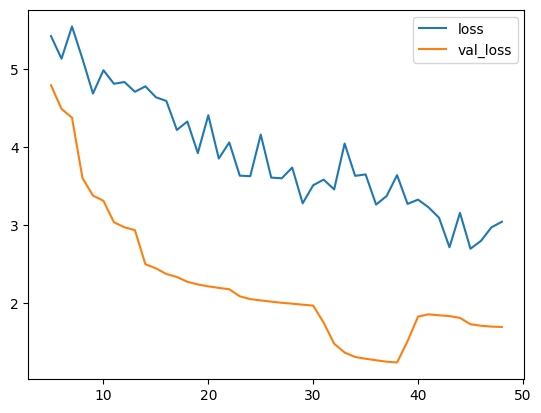

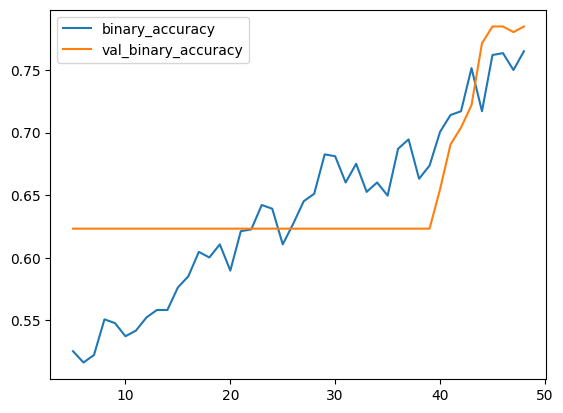

In [38]:
history_df = pd.DataFrame(history.history)

history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best validation loss: {:0.4f}" +\
    "\nBest Validation Accuracy:{:0.4f}")\
        .format(history_df['val_loss'].min(),
                history_df['val_binary_accuracy'].max()))

In [40]:
# preprocess test X_test
Xtest = np.asarray(X_test).astype(np.float32)
Xtest = sc.fit_transform(Xtest)
tfPrediction = model.predict(Xtest)

output = pd.DataFrame({'PassengerId':test_data.PassengerId, "Survived":predictions})
output.head()

14/14 [==============================] - 0s 3ms/step


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# put this submission in own folder
output.to_csv('submissions/tf/submission.csv', index=False)

# Pytorch